<a href="https://colab.research.google.com/github/alla-g/ml_bootcamp_hw/blob/main/Flight_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Удовлетворённость полётом

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [92]:
RANDOM_STATE = 42

In [93]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [94]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)
df.head(5)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [95]:
# информация о датасете
df.shape

(129880, 24)

In [96]:
# информация о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [97]:
# информация о числовых колонках
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Сразу заметим странности в максимальных значениях возраста, расстояния, задержек рейсов и оценок (которые, вероятно, должны быть в рамках пятибалльной шкалы). А также в минимальном значении расстояния полёта

Запомним это и детальнее разберёмся с этими странностями далее

### Оценка качества данных

#### Выбросы

Рассмотрим отдельно колонки с оценками и на колонки с остальными признаками

In [98]:
score_cols = list(df.select_dtypes(include=['float64']))[4:]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


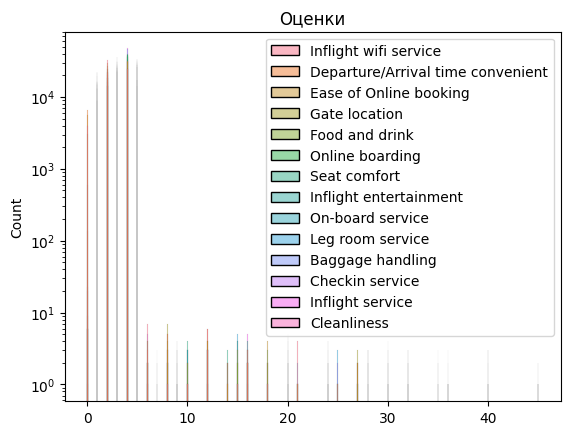

In [99]:
sns.histplot(df[score_cols]).set(title='Оценки')
plt.yscale('log')
plt.show()

In [100]:
df[score_cols].max()

Inflight wifi service                45.0
Departure/Arrival time convenient    45.0
Ease of Online booking               45.0
Gate location                        36.0
Food and drink                       45.0
Online boarding                      40.0
Seat comfort                         45.0
Inflight entertainment               45.0
On-board service                     45.0
Leg room service                     40.0
Baggage handling                     40.0
Checkin service                      45.0
Inflight service                     40.0
Cleanliness                          45.0
dtype: float64

На логарифмической шкале заметно, что во всех колонках есть выбивающиеся оцень большие оценки. Проверим на одном примере, что шкала в опроснике действиетльно пятибалльная:

In [101]:
answers = pd.DataFrame(df[[score_cols[0]]].value_counts(), columns=['Встречаемость'])
answers

,Встречаемость
Inflight wifi service,
2.0,32306
3.0,32156
4.0,24758
1.0,22318
5.0,14345
0.0,3918
6.0,7
21.0,4
16.0,3


Оценки от 0 до 5 включительно встречаются тысячи раз, а оценки от 6 и выше единичны. В реальной ситуации можно было бы обратиться к составителями опроса и уточнить, как получились такие числа. Но такой возможности нет, поэтому я удалю эти данные, временно заменив на NaN, и в следующем разделе буду обрабатывать как пропуски.

In [102]:
for col in score_cols:
    df[col] = np.where(df[col] > 5, np.NaN, df[col])

# проверка:
df[score_cols].max()

Inflight wifi service                5.0
Departure/Arrival time convenient    5.0
Ease of Online booking               5.0
Gate location                        5.0
Food and drink                       5.0
Online boarding                      5.0
Seat comfort                         5.0
Inflight entertainment               5.0
On-board service                     5.0
Leg room service                     5.0
Baggage handling                     5.0
Checkin service                      5.0
Inflight service                     5.0
Cleanliness                          5.0
dtype: float64

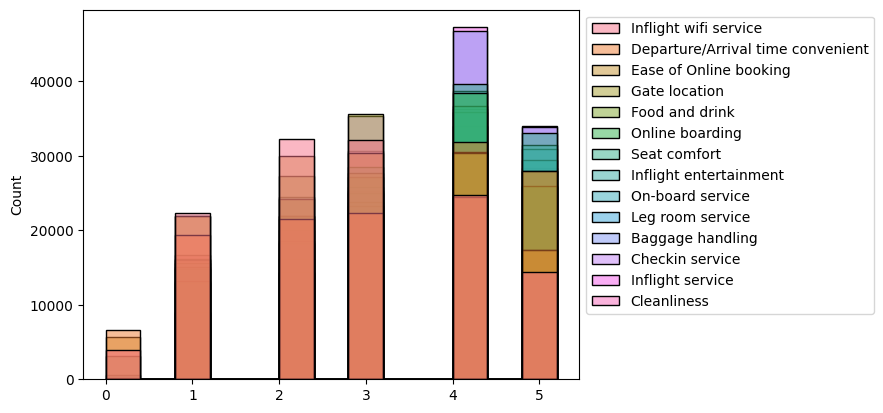

In [103]:
h = sns.histplot(df[score_cols], binwidth=0.4)
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1))

Теперь все шкалы с оценками распределены корректно. Перейдём к оставшимся признакам

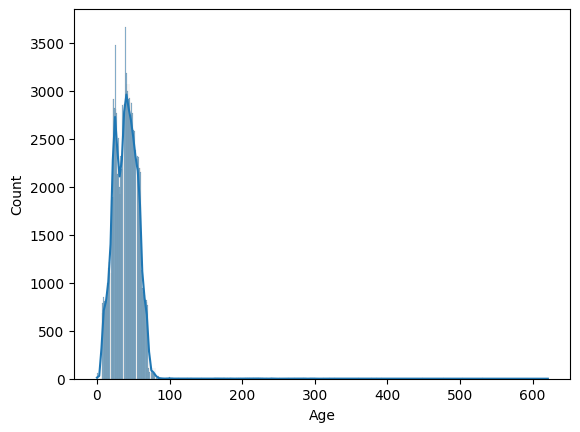

In [104]:
sns.histplot(df['Age'], kde=True)
plt.show()

Здесь есть явные выбросы по возрасту. Опираясь на здравый смысл, установим предел в 100 лет

In [105]:
df['Age'] = np.where(df['Age'] > 100, np.NaN, df['Age'])

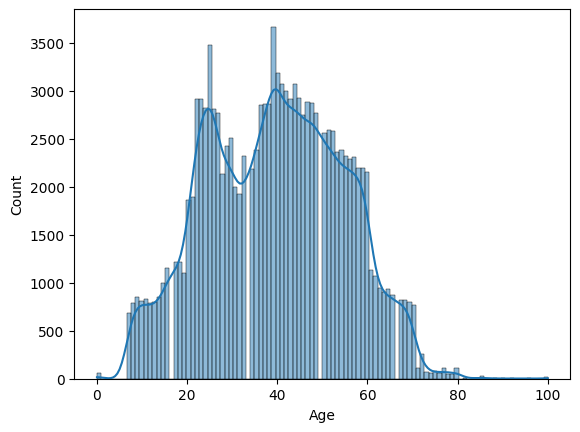

In [106]:
sns.histplot(df['Age'], kde=True)
plt.show()

Дистанция. Это не такой очевидный параметр, как предыдущие, поэтому здесь я посчитаю за выбросы всё, что больше 95 перцентиля

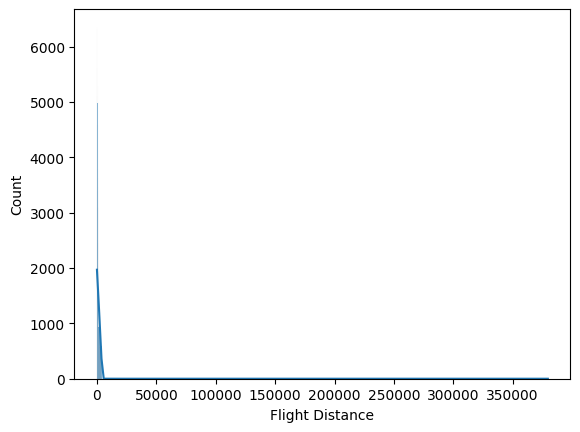

In [107]:
# до обработки
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

In [108]:
flight_95 = np.nanpercentile(df['Flight Distance'], 95)

df['Flight Distance'] = np.where(df['Flight Distance'] > flight_95, np.NaN, df['Flight Distance'])

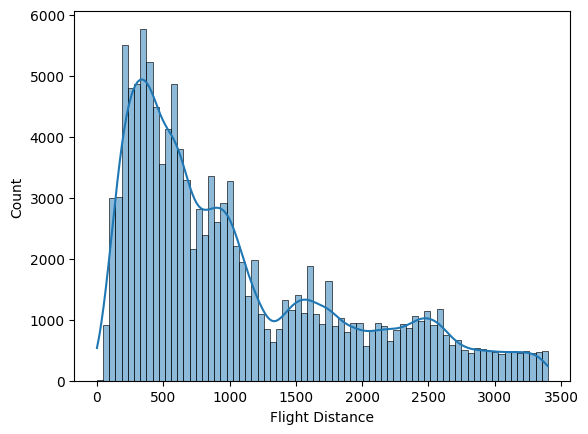

In [109]:
# после
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

И то же самое с задержкой вылета и прилёта (в обоих признаках есть нереалистично большие значения, которые видно только на логарифмической шкале)

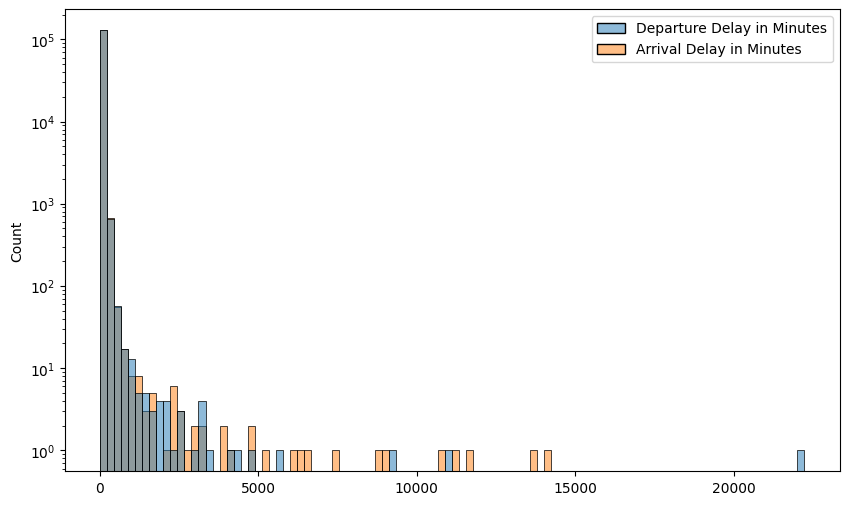

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']], bins=100)
plt.yscale('log')
plt.show()

In [111]:
# nb: здесь перцентиль 99
departure_99 = np.nanpercentile(df['Departure Delay in Minutes'], 99)
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] > departure_99, np.NaN, df['Departure Delay in Minutes'])

arrival_99 = np.nanpercentile(df['Arrival Delay in Minutes'], 99)
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] > arrival_99, np.NaN, df['Arrival Delay in Minutes'])

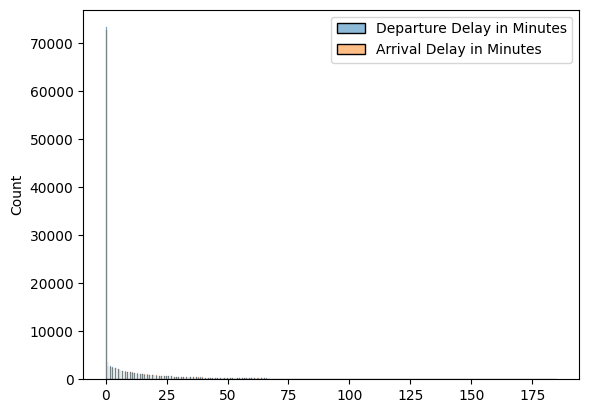

In [112]:
sns.histplot(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']])
plt.show()

После удаления выбросов время задержки не превысило ≈3 часа

#### Дубли и пропуски

Узнаем, есть ли дубли:

In [113]:
duplicates = df[df.duplicated()]
len(duplicates)

0

Посчитаем пропуски в колонках (помним, что часть из них возникла на месте выбросов):

In [114]:
nulls = pd.DataFrame(df.isna().sum(), columns=['NaN count'])
nulls['NaN %'] = round(df.isna().sum() * 100 / len(df), 2)
nulls

,NaN count,NaN %
id,0,0.00
Gender,331,0.25
Age,726,0.56
Customer Type,77,0.06
Type of Travel,101,0.08
Class,116,0.09
Flight Distance,6579,5.07
Departure Delay in Minutes,1403,1.08
Arrival Delay in Minutes,1784,1.37
Inflight wifi service,79,0.06


Видно, что во всех колонках, кроме id и satisfaction, есть отсутствующие значения. Можно предположить, что эти пропуски распределены не равномерно и в датасете есть строки, для которых почти вся информация отсутствует. В таком случае строки, которые почти не содержат информации было бы разумнее удалить, а не заполнять их искуственно.

Чтобы это проверить, посчитаем, сколько пропусков вообще бывает в каждой строке:

In [115]:
df['n_nulls'] = df.isnull().sum(axis=1)
df['n_nulls'].value_counts()

0    119022
1      9547
2      1230
3        80
4         1
Name: n_nulls, dtype: int64

Гипотеза не подтвердилась, все строки содержат не больше трёх пропусков. Следовательно, не получится избавиться от большинства из них ценой всего нескольских строк данных

Как было видно выше, в этих колонках пропуски занимают десятые и сотые доли процента. Я заменю их на средние значения для соответствующей колонки (важно, что среднее здесь считается уже без выбросов):

In [116]:
has_nulls = nulls[nulls['NaN count'] > 0].index

In [117]:
has_nulls

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [119]:
for col in has_nulls:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)

Пропуски в числовых колонках заполнены, теперь внимательнее рассмотрим нечисловые колонки

In [120]:
object_cols = list(df.select_dtypes(include=['object']))
for col in object_cols:
    print(df[col].value_counts(dropna=False), '\n')

Female    65726
Male      63823
NaN         331
Name: Gender, dtype: int64 

Loyal Customer       106040
disloyal Customer     23763
NaN                      77
Name: Customer Type, dtype: int64 

Business travel    89625
Personal Travel    40154
NaN                  101
Name: Type of Travel, dtype: int64 

Business    62103
Eco         58264
Eco Plus     9397
NaN           116
Name: Class, dtype: int64 

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64 



В этих колонках небольшое количество NaN-ов, заполнить которые средним/модой было бы странно, а для выделения в отдельную категорию пропусков слишком мало. Строки с этими данными я выберу удалить

In [121]:
df.dropna(subset = object_cols, inplace=True)

Обратим внимание, что в колонке satisfaction есть прочерки, не обозначенные как NaN!

Так как это целевая переменная, заменить её модой или категорией unknown будет некорректно. Эти данные придётся удалить из набора, так как для текущей задачи для обучения нам важен правильный ответ

In [122]:
df = df[df['satisfaction'] != '-']

#### Кодирование категориальных признаков
У нас 5 колонок с категориальными признаками, 4 из которых бинарные. Я выполню кодирование на всём массиве данных, ещё до разбиения на трейн и тест

In [123]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
df['Loyalty'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df['Business'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)
df['Satisfied'] = df['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

<ipython-input-123-3dae5ce45cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
<ipython-input-123-3dae5ce45cc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loyalty'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
<ipython-input-123-3dae5ce45cc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [124]:
enc_class = pd.get_dummies(df['Class'], drop_first=True)
df = pd.concat([df, enc_class], axis=1)
df.head(3)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Checkin service,Inflight service,Cleanliness,satisfaction,n_nulls,Loyalty,Business,Satisfied,Eco,Eco Plus
0,1,0,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,4.0,5.0,5.0,neutral or dissatisfied,0,0,1,0,0,0
1,2,1,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,3.0,5.0,5.0,satisfied,0,1,1,1,0,0
2,3,0,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,4.0,3.0,5.0,satisfied,0,1,1,1,0,0


In [125]:
df.drop(['Type of Travel', 'Customer Type', 'satisfaction', 'n_nulls', 'Class'], axis=1, inplace=True)

#### Корреляция признаков

<Axes: >

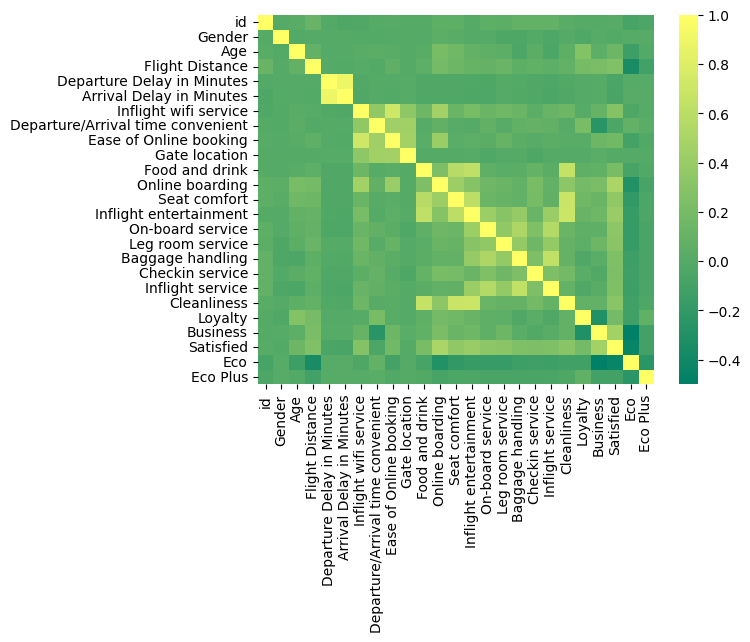

In [126]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='summer')

На глаз можно заметить, что признаки, касающиеся оценок в анкете, коррелируют, карта светлее в районе их пересечения. Но в целом признаки датасета не так сильно скоррелированы между собой, а значит, не будут мешать строить модель

## Обучение модели

### Формирование выборок

Разделим данные на выборки и выполним масштабирование

In [127]:
X, y = df.drop(['id', 'Satisfied'], axis=1), df['Satisfied']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((82720, 23), (20681, 23))

In [129]:
ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,Gender,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Loyalty,Business,Eco,Eco Plus
0,0.0,0.32,0.270509,0.076503,0.432432,0.2,0.2,0.6,0.6,0.2,...,0.8,0.2,0.6,0.2,0.6,0.2,1.0,1.0,0.0,0.0
1,0.0,0.59,0.832108,0.000000,0.000000,0.4,0.4,0.4,0.4,0.6,...,1.0,1.0,0.6,0.6,1.0,0.6,1.0,1.0,0.0,0.0
2,0.0,0.29,0.167304,0.000000,0.000000,0.2,1.0,0.4,0.4,0.8,...,1.0,1.0,0.8,1.0,0.8,0.8,1.0,0.0,1.0,0.0
3,1.0,0.00,0.426933,0.000000,0.000000,0.6,0.6,0.6,0.6,0.2,...,0.2,1.0,0.6,0.4,0.8,0.2,0.0,1.0,0.0,0.0
4,1.0,0.57,0.491032,0.000000,0.000000,0.6,0.2,0.2,0.2,1.0,...,0.6,0.6,0.6,0.8,0.6,0.6,1.0,1.0,0.0,0.0


### Обучение

In [130]:
model = LogisticRegression(max_iter=500)

model.fit(X_train, y_train)

preds = model.predict(X_test)

### Оценка

In [131]:
print(f'Accuracy: {round(accuracy_score(y_test, preds), 3)}')
print(f'Precision: {round(precision_score(y_test, preds), 3)}')
print(f'Recall: {round(recall_score(y_test, preds), 3)}')

Accuracy: 0.874
Precision: 0.868
Recall: 0.835


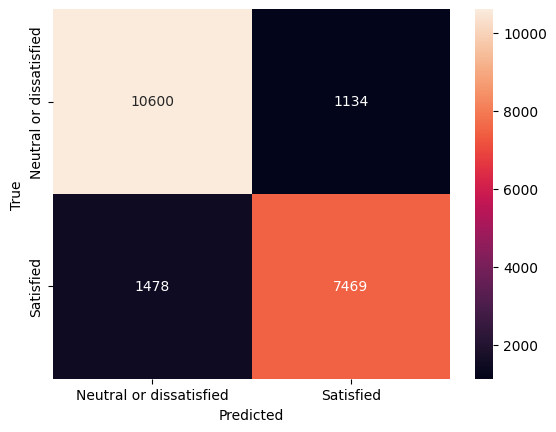

In [132]:
ax = sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')

ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

ax.set_ylabel('True')
ax.yaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

plt.show()

В описании датасета не указано, для чего конкретно могут использоваться эти данные. Однако, можно обратить внимание на целевую переменную. Нейтральные и недовольные клиенты объединены в общую категорию, а довольные выделены отдельно.

Опираясь на это, я могу предположить два бизнесовых обоснования для использования модели:

1) у авиакомпании очень строгие менеджеры, и даже нейтральный клиент их не устраивает, они хотят выделять даже клиентов с нейтральным опытом на основе их данных и постполётных опросников и брать их в работу, как-то повышать их лояльность. В этом случае будет важна полнота (найти как можно больше недовольных и нейтральных клиентов, чтобы повысить их лояльность и не потерять), но тогда классы нужно перекодировать обратным образом (1 - расстроенный или нейтральный, именно их мы и хотим выделить максимально полно)

2) менеджеры хотят понять, какие детали полёта сильнее всего снижают удовлетворённость, чтобы фиксить опыт не отдельного человека целиком, а исправлять отдельные слабые места в сервисе. В таком случае сама предказательная способность модели не очень важна, важны её веса, которые отражают влияние признаков на впечатление клиентов. В этом случае нет предпочтений точности или полноте, важна общая хорошая объяснительная способность модели

### Интерпретация
Вторая ситуация мне кажется интереснее, и я буду придерживаться такой легеды

Извлечём веса из модели и отсортируем по значимости (не учитывая знак).Помним, что признаки перед обучением были нормированы, а значит, модель можно интерпретировать

In [65]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances.sort_values(by='weights', key=abs, ascending=False)

,weights,features
3,-4.479310,Departure Delay in Minutes
10,3.048831,Online boarding
20,2.700611,Business
4,-2.590044,Arrival Delay in Minutes
19,2.023835,Loyalty
5,1.947920,Inflight wifi service
16,1.597672,Checkin service
13,1.522757,On-board service
14,1.213510,Leg room service
18,1.108847,Cleanliness


Если бы менеджер попросил список из 10 самых важных пунктов для удовлетворённости клиента, мы бы передали следующие:

*задержка рейса, оценка онлайн посадки, полёт по работе, задержка прибытия, лояльность клиента (что бы это ни значило), оценка вайфая на борту, регистрации, места для ног и чистоты на борту*

Шесть из десяти самых важных признаков - оценки из постполётоного опросника. Ожидаемо, что они позитивно связаны с удовлетворённостью. Лояльные клиенты и клиенты, летевшие по работе (а не по личным делам), будут тоже более довольны опытом. А вот задержка вылета и прилёта плохо сказывается на общем впечатлении, причём задержка вылета влияет хуже, чем задержка прилёта.

Меньше всего на удовлетворённость полётом влияет пол пассажира, оценки питания, и расположения гейта, а также расстояние полёта